<a href="https://colab.research.google.com/github/Jihwan98/jihwan/blob/master/%EA%B8%B0%EB%A7%90_%EB%A0%88%ED%8F%AC%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 문데이터 생성

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
noisy_moons = datasets.make_moons(
    n_samples = 100,
    noise = 0.5,
    random_state=42,
)
X, y = noisy_moons
print('number of X: ', len(X), '/ shape of X: ', X.shape)
print('number of y: ', len(y), '/ shape of y: ', y.shape)

number of X:  100 / shape of X:  (100, 2)
number of y:  100 / shape of y:  (100,)


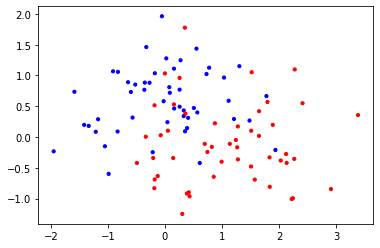

In [3]:
import numpy as np
import matplotlib.pyplot as plt
colors = np.array(['blue', 'red'])

plt.scatter(
    X[:,0],
    X[:,1],
    s = 10,
    color=colors[y])

# train_set과 test_set으로 나눠주기

In [4]:
y = y.reshape(100,-1)
data = np.concatenate((X,y), axis=1)

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
  train_set = data[train_index]
  test_set = data[test_index]

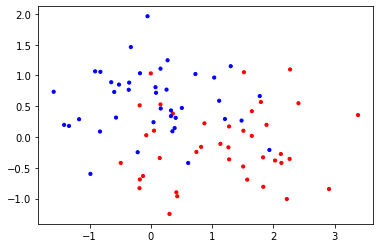

In [6]:
plt.scatter(
    train_set[:,0],
    train_set[:,1],
    s = 10,
    color=colors[train_set[:,2].astype(int)])

## Standardization

In [22]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler().fit(train_set[:,0:2])
std_train_set = std_scaler.transform(train_set[:,0:2])
std_test_set = std_scaler.transform(test_set[:,0:2])

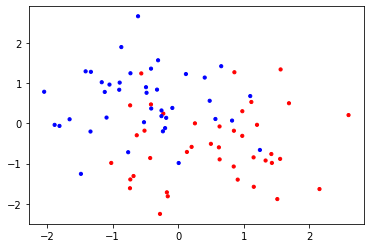

In [16]:
plt.scatter(
    std_train_set[:,0],
    std_train_set[:,1],
    s = 10,
    color=colors[train_set[:,2].astype(int)])

# Training

In [23]:
X_train = std_train_set[:,0:2]
y_train = train_set[:,2]
X_test = std_test_set[:,0:2]
y_test = test_set[:,2]

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def score(model, X, y):
  print("-----------------------------------------------")
  print("accuracy_score\t:\t", accuracy_score(y, model.predict(X)))
  print("precision_score\t:\t", precision_score(y, model.predict(X)))
  print("recall_score\t:\t", recall_score(y, model.predict(X)))
  print("f1_score\t:\t", f1_score(y, model.predict(X)))
  print("-----------------------------------------------")

In [9]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

## SGDClassifier

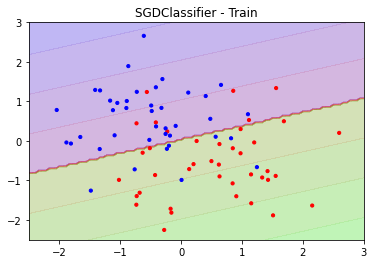

-----------------------------------------------
accuracy_score	:	 0.8125
precision_score	:	 0.8048780487804879
recall_score	:	 0.825
f1_score	:	 0.8148148148148149
-----------------------------------------------


In [51]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

plot_predictions(sgd_clf, [-2.5, 3, -2.5, 3])
plt.scatter(
    X_train[:,0],
    X_train[:,1],
    s = 10,
    color=colors[y_train.astype(int)])
plt.title("SGDClassifier - Train")
plt.show()

score(sgd_clf, X_train, y_train)

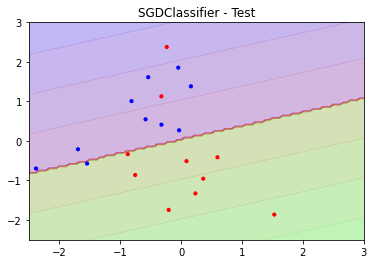

-----------------------------------------------
accuracy_score	:	 0.85
precision_score	:	 0.8888888888888888
recall_score	:	 0.8
f1_score	:	 0.8421052631578948
-----------------------------------------------


In [52]:
plot_predictions(sgd_clf, [-2.5, 3, -2.5, 3])
plt.scatter(
    X_test[:,0],
    X_test[:,1],
    s = 10,
    color=colors[y_test.astype(int)])
plt.title("SGDClassifier - Test")
plt.show()

score(sgd_clf, X_test, y_test)

## SVC with RBF kernel

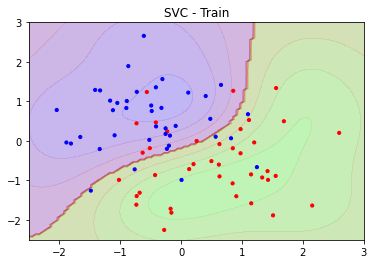

-----------------------------------------------
accuracy_score	:	 0.8125
precision_score	:	 0.8205128205128205
recall_score	:	 0.8
f1_score	:	 0.810126582278481
-----------------------------------------------


In [62]:
from sklearn.svm import SVC
svc_clf = SVC(kernel="rbf")
svc_clf.fit(X_train, y_train)

plot_predictions(svc_clf, [-2.5, 3, -2.5, 3])
plt.scatter(
    X_train[:,0],
    X_train[:,1],
    s = 10,
    color=colors[y_train.astype(int)])
plt.title("SVC - Train")
plt.show()

score(svc_clf, X_train, y_train)

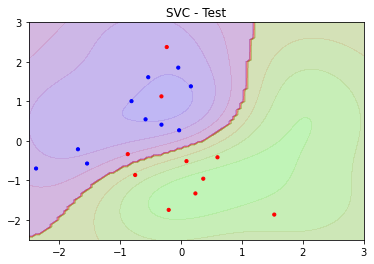

-----------------------------------------------
accuracy_score	:	 0.85
precision_score	:	 1.0
recall_score	:	 0.7
f1_score	:	 0.8235294117647058
-----------------------------------------------


In [54]:
plot_predictions(svc_clf, [-2.5, 3, -2.5, 3])
plt.scatter(
    X_test[:,0],
    X_test[:,1],
    s = 10,
    color=colors[y_test.astype(int)])
plt.title("SVC - Test")
plt.show()

score(svc_clf, X_test, y_test)

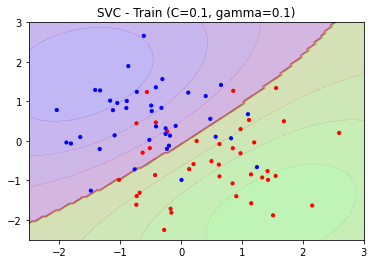

-----------------------------------------------
accuracy_score	:	 0.85
precision_score	:	 0.868421052631579
recall_score	:	 0.825
f1_score	:	 0.8461538461538461
-----------------------------------------------


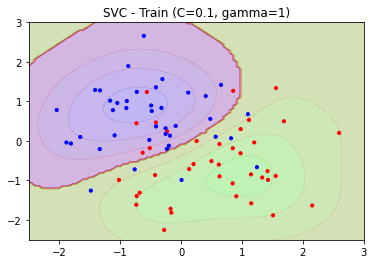

-----------------------------------------------
accuracy_score	:	 0.825
precision_score	:	 0.825
recall_score	:	 0.825
f1_score	:	 0.825
-----------------------------------------------


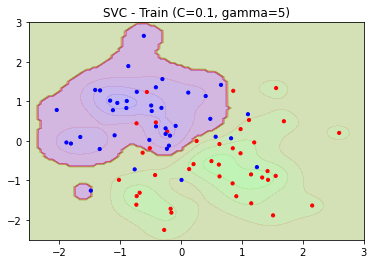

-----------------------------------------------
accuracy_score	:	 0.8625
precision_score	:	 0.8536585365853658
recall_score	:	 0.875
f1_score	:	 0.8641975308641976
-----------------------------------------------


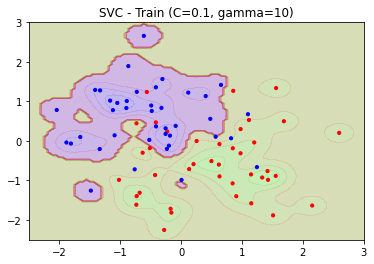

-----------------------------------------------
accuracy_score	:	 0.8875
precision_score	:	 0.8604651162790697
recall_score	:	 0.925
f1_score	:	 0.891566265060241
-----------------------------------------------


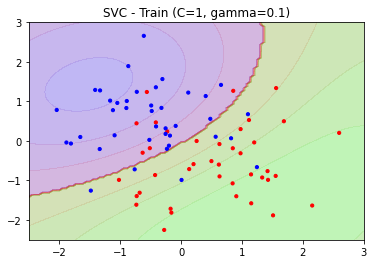

-----------------------------------------------
accuracy_score	:	 0.825
precision_score	:	 0.825
recall_score	:	 0.825
f1_score	:	 0.825
-----------------------------------------------


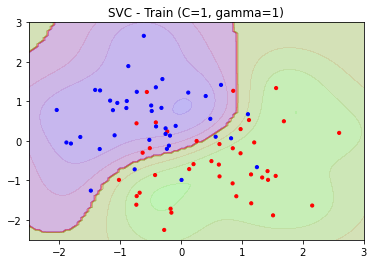

-----------------------------------------------
accuracy_score	:	 0.825
precision_score	:	 0.8421052631578947
recall_score	:	 0.8
f1_score	:	 0.8205128205128205
-----------------------------------------------


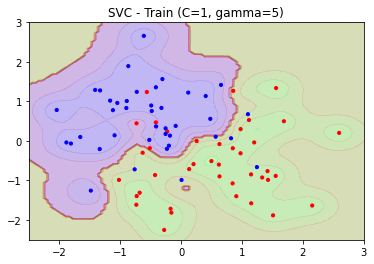

-----------------------------------------------
accuracy_score	:	 0.8625
precision_score	:	 0.8536585365853658
recall_score	:	 0.875
f1_score	:	 0.8641975308641976
-----------------------------------------------


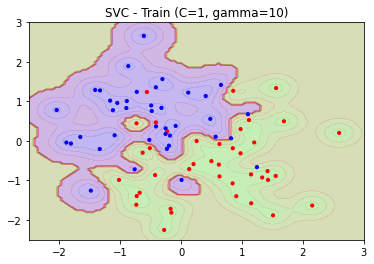

-----------------------------------------------
accuracy_score	:	 0.925
precision_score	:	 0.925
recall_score	:	 0.925
f1_score	:	 0.925
-----------------------------------------------


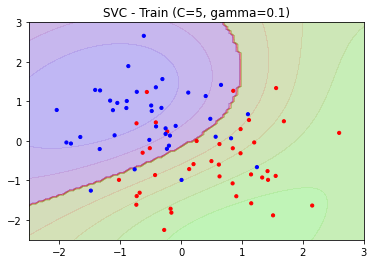

-----------------------------------------------
accuracy_score	:	 0.825
precision_score	:	 0.825
recall_score	:	 0.825
f1_score	:	 0.825
-----------------------------------------------


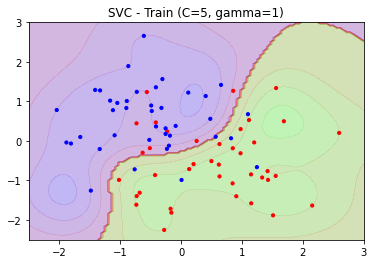

-----------------------------------------------
accuracy_score	:	 0.825
precision_score	:	 0.8421052631578947
recall_score	:	 0.8
f1_score	:	 0.8205128205128205
-----------------------------------------------


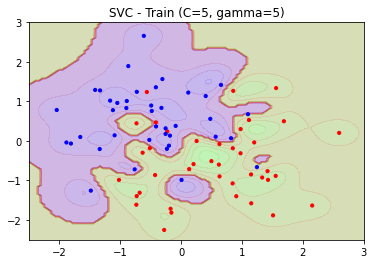

-----------------------------------------------
accuracy_score	:	 0.9375
precision_score	:	 0.9487179487179487
recall_score	:	 0.925
f1_score	:	 0.9367088607594937
-----------------------------------------------


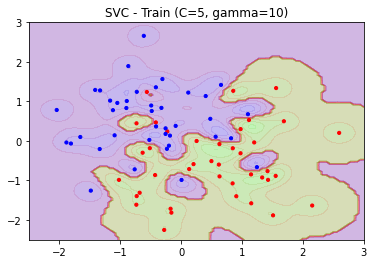

-----------------------------------------------
accuracy_score	:	 0.9625
precision_score	:	 1.0
recall_score	:	 0.925
f1_score	:	 0.961038961038961
-----------------------------------------------


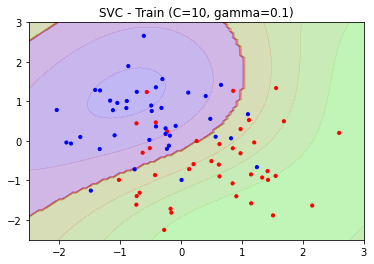

-----------------------------------------------
accuracy_score	:	 0.8125
precision_score	:	 0.8205128205128205
recall_score	:	 0.8
f1_score	:	 0.810126582278481
-----------------------------------------------


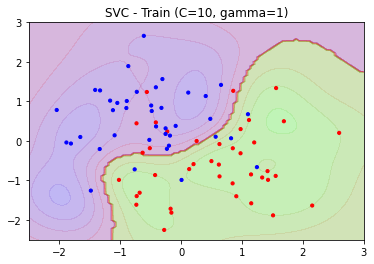

-----------------------------------------------
accuracy_score	:	 0.825
precision_score	:	 0.8421052631578947
recall_score	:	 0.8
f1_score	:	 0.8205128205128205
-----------------------------------------------


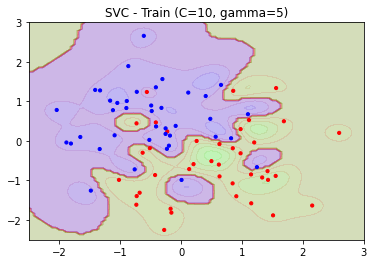

-----------------------------------------------
accuracy_score	:	 0.9625
precision_score	:	 1.0
recall_score	:	 0.925
f1_score	:	 0.961038961038961
-----------------------------------------------


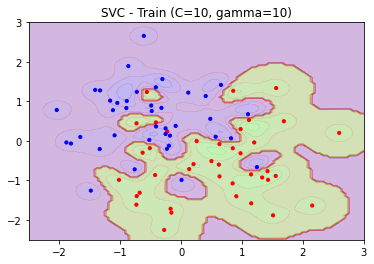

-----------------------------------------------
accuracy_score	:	 0.9875
precision_score	:	 1.0
recall_score	:	 0.975
f1_score	:	 0.9873417721518987
-----------------------------------------------


In [65]:
C_list = [0.1, 1, 5, 10]
gamma_list = [0.1, 1, 5, 10]
for i in C_list:
  for j in gamma_list: 
    svc_clf = SVC(kernel="rbf",C=i,gamma=j)
    svc_clf.fit(X_train, y_train)

    plot_predictions(svc_clf, [-2.5, 3, -2.5, 3])
    plt.scatter(
        X_train[:,0],
        X_train[:,1],
        s = 10,
        color=colors[y_train.astype(int)])
    plt.title("SVC - Train (C={}, gamma={})".format(i,j))
    plt.show()

    score(svc_clf, X_train, y_train)

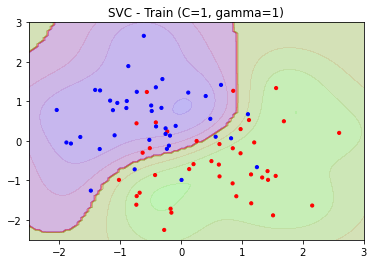

-----------------------------------------------
accuracy_score	:	 0.825
precision_score	:	 0.8421052631578947
recall_score	:	 0.8
f1_score	:	 0.8205128205128205
-----------------------------------------------


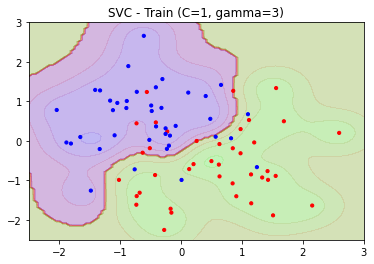

-----------------------------------------------
accuracy_score	:	 0.825
precision_score	:	 0.8421052631578947
recall_score	:	 0.8
f1_score	:	 0.8205128205128205
-----------------------------------------------


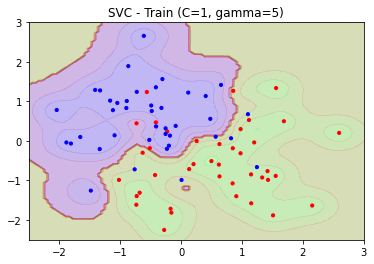

-----------------------------------------------
accuracy_score	:	 0.8625
precision_score	:	 0.8536585365853658
recall_score	:	 0.875
f1_score	:	 0.8641975308641976
-----------------------------------------------


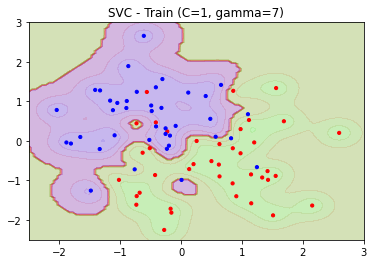

-----------------------------------------------
accuracy_score	:	 0.9125
precision_score	:	 0.9024390243902439
recall_score	:	 0.925
f1_score	:	 0.9135802469135802
-----------------------------------------------


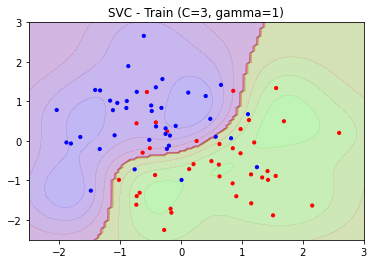

-----------------------------------------------
accuracy_score	:	 0.825
precision_score	:	 0.8421052631578947
recall_score	:	 0.8
f1_score	:	 0.8205128205128205
-----------------------------------------------


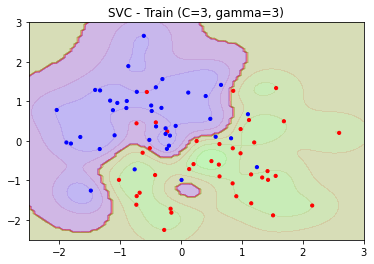

-----------------------------------------------
accuracy_score	:	 0.8625
precision_score	:	 0.8536585365853658
recall_score	:	 0.875
f1_score	:	 0.8641975308641976
-----------------------------------------------


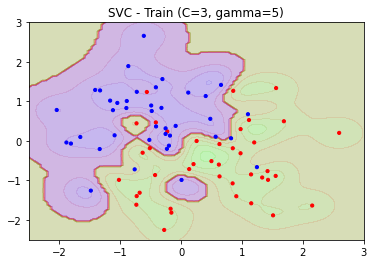

-----------------------------------------------
accuracy_score	:	 0.9125
precision_score	:	 0.9024390243902439
recall_score	:	 0.925
f1_score	:	 0.9135802469135802
-----------------------------------------------


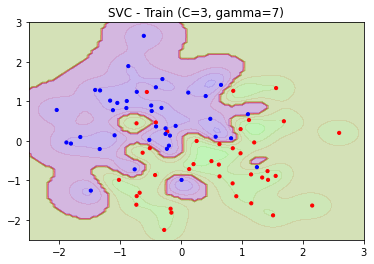

-----------------------------------------------
accuracy_score	:	 0.95
precision_score	:	 0.9736842105263158
recall_score	:	 0.925
f1_score	:	 0.9487179487179489
-----------------------------------------------


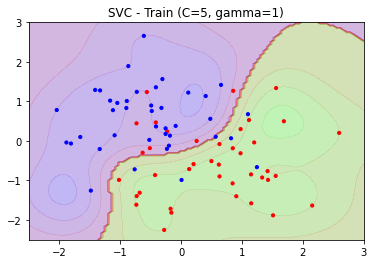

-----------------------------------------------
accuracy_score	:	 0.825
precision_score	:	 0.8421052631578947
recall_score	:	 0.8
f1_score	:	 0.8205128205128205
-----------------------------------------------


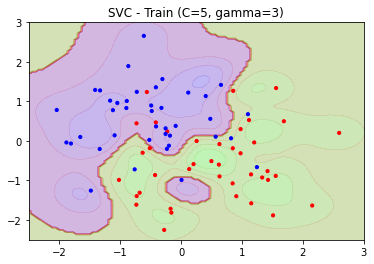

-----------------------------------------------
accuracy_score	:	 0.8875
precision_score	:	 0.8780487804878049
recall_score	:	 0.9
f1_score	:	 0.888888888888889
-----------------------------------------------


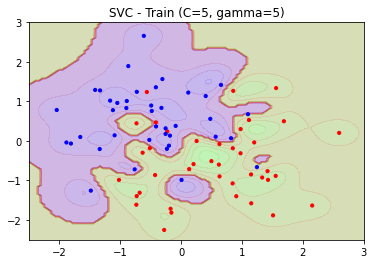

-----------------------------------------------
accuracy_score	:	 0.9375
precision_score	:	 0.9487179487179487
recall_score	:	 0.925
f1_score	:	 0.9367088607594937
-----------------------------------------------


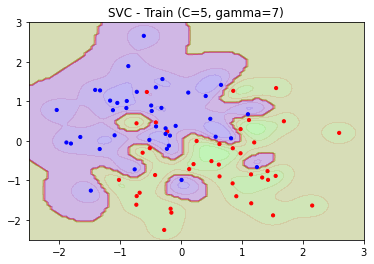

-----------------------------------------------
accuracy_score	:	 0.9625
precision_score	:	 1.0
recall_score	:	 0.925
f1_score	:	 0.961038961038961
-----------------------------------------------


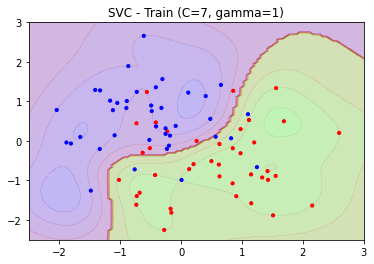

-----------------------------------------------
accuracy_score	:	 0.825
precision_score	:	 0.8421052631578947
recall_score	:	 0.8
f1_score	:	 0.8205128205128205
-----------------------------------------------


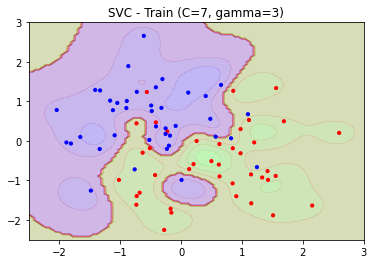

-----------------------------------------------
accuracy_score	:	 0.9
precision_score	:	 0.8809523809523809
recall_score	:	 0.925
f1_score	:	 0.9024390243902439
-----------------------------------------------


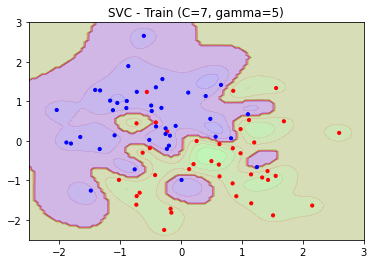

-----------------------------------------------
accuracy_score	:	 0.9625
precision_score	:	 1.0
recall_score	:	 0.925
f1_score	:	 0.961038961038961
-----------------------------------------------


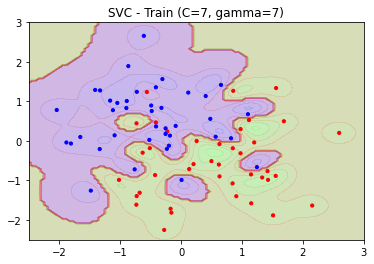

-----------------------------------------------
accuracy_score	:	 0.9625
precision_score	:	 1.0
recall_score	:	 0.925
f1_score	:	 0.961038961038961
-----------------------------------------------


In [70]:
C_list = [1, 3, 5, 7]
gamma_list = [1, 3, 5, 7]
for i in C_list:
  for j in gamma_list: 
    svc_clf = SVC(kernel="rbf",C=i,gamma=j)
    svc_clf.fit(X_train, y_train)

    plot_predictions(svc_clf, [-2.5, 3, -2.5, 3])
    plt.scatter(
        X_train[:,0],
        X_train[:,1],
        s = 10,
        color=colors[y_train.astype(int)])
    plt.title("SVC - Train (C={}, gamma={})".format(i,j))
    plt.show()

    score(svc_clf, X_train, y_train)

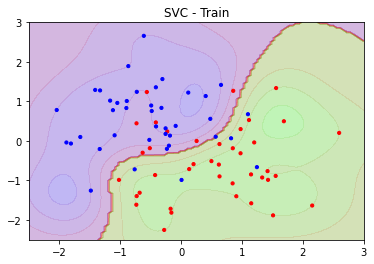

-----------------------------------------------
accuracy_score	:	 0.825
precision_score	:	 0.8421052631578947
recall_score	:	 0.8
f1_score	:	 0.8205128205128205
-----------------------------------------------


In [71]:
from sklearn.svm import SVC
svc_clf = SVC(kernel="rbf", C=5, gamma=1)
svc_clf.fit(X_train, y_train)

plot_predictions(svc_clf, [-2.5, 3, -2.5, 3])
plt.scatter(
    X_train[:,0],
    X_train[:,1],
    s = 10,
    color=colors[y_train.astype(int)])
plt.title("SVC - Train")
plt.show()

score(svc_clf, X_train, y_train)

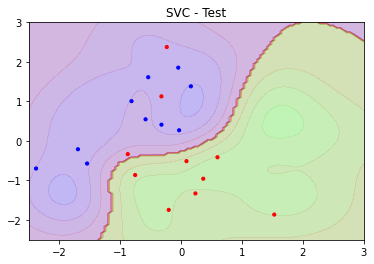

-----------------------------------------------
accuracy_score	:	 0.85
precision_score	:	 1.0
recall_score	:	 0.7
f1_score	:	 0.8235294117647058
-----------------------------------------------


In [72]:
plot_predictions(svc_clf, [-2.5, 3, -2.5, 3])
plt.scatter(
    X_test[:,0],
    X_test[:,1],
    s = 10,
    color=colors[y_test.astype(int)])
plt.title("SVC - Test")
plt.show()

score(svc_clf, X_test, y_test)

## Random Forest

In [55]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes, alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    # plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    # plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)

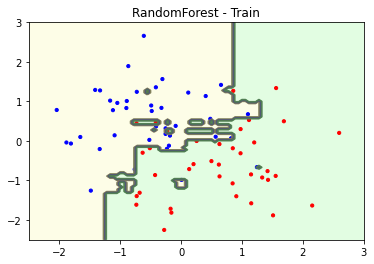

-----------------------------------------------
accuracy_score	:	 1.0
precision_score	:	 1.0
recall_score	:	 1.0
f1_score	:	 1.0
-----------------------------------------------


In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

plot_decision_boundary(rf_clf,X_train, y_train, [-2.5, 3, -2.5, 3])
plt.scatter(
    X_train[:,0],
    X_train[:,1],
    s = 10,
    color=colors[y_train.astype(int)])
plt.title("RandomForest - Train")
plt.show()

score(rf_clf, X_train, y_train)

- 과도하게 overfit 되어있으므로 max_depth를 조절

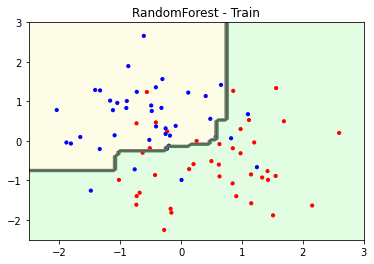

-----------------------------------------------
accuracy_score	:	 0.8375
precision_score	:	 0.8292682926829268
recall_score	:	 0.85
f1_score	:	 0.8395061728395061
-----------------------------------------------


In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=1)
rf_clf.fit(X_train, y_train)

plot_decision_boundary(rf_clf,X_train, y_train, [-2.5, 3, -2.5, 3])
plt.scatter(
    X_train[:,0],
    X_train[:,1],
    s = 10,
    color=colors[y_train.astype(int)])
plt.title("RandomForest - Train")
plt.show()

score(rf_clf, X_train, y_train)

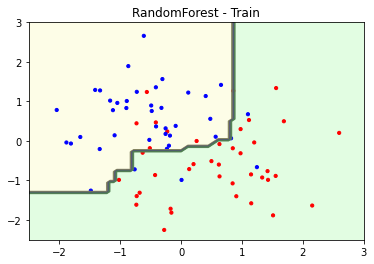

-----------------------------------------------
accuracy_score	:	 0.875
precision_score	:	 0.8947368421052632
recall_score	:	 0.85
f1_score	:	 0.8717948717948718
-----------------------------------------------


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=2)
rf_clf.fit(X_train, y_train)

plot_decision_boundary(rf_clf,X_train, y_train, [-2.5, 3, -2.5, 3])
plt.scatter(
    X_train[:,0],
    X_train[:,1],
    s = 10,
    color=colors[y_train.astype(int)])
plt.title("RandomForest - Train")
plt.show()

score(rf_clf, X_train, y_train)

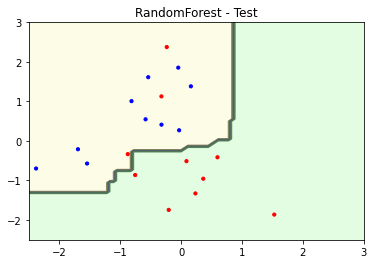

-----------------------------------------------
accuracy_score	:	 0.85
precision_score	:	 1.0
recall_score	:	 0.7
f1_score	:	 0.8235294117647058
-----------------------------------------------


In [59]:
plot_decision_boundary(rf_clf,X_test, y_test, [-2.5, 3, -2.5, 3])
plt.scatter(
    X_test[:,0],
    X_test[:,1],
    s = 10,
    color=colors[y_test.astype(int)])
plt.title("RandomForest - Test")
plt.show()

score(rf_clf, X_test, y_test)